In [1]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:

# Function to train the model, evaluate, and predict
def train_evaluate_and_predict(X, y, crop_name, market_price, production_cost):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model Evaluation for {crop_name}:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R²): {r2}")
    
    # Future data for prediction (Market_Price and Production_Cost for November and December)
    future_data = pd.DataFrame({
        'Market_Price': [market_price[0], market_price[1]], # predicted/expected market prices
        'Production_Cost': [production_cost[0], production_cost[1]] # predicted/expected costs
    })
    
    # Predict the Gross Profit Margin for November and December 2024
    predictions = model.predict(future_data)
    
    print(f"Predictions for {crop_name}:")
    print(f"November 2024: {predictions[0]}")
    print(f"December 2024: {predictions[1]}")
    return predictions


In [3]:

# Example values for future Market_Price and Production_Cost
market_price_tomatoes = [30.0, 31.0] # Expected values for November and December
production_cost_tomatoes = [10.0, 9.5]

market_price_spinach = [25.0, 26.0]
production_cost_spinach = [8.0, 7.5]

market_price_carrots = [22.0, 23.0]
production_cost_carrots = [6.0, 5.8]

# Train, evaluate, and predict for each crop
predictions_tomatoes = train_evaluate_and_predict(X_tomatoes, y_tomatoes, 'Tomatoes', market_price_tomatoes, production_cost_tomatoes)
predictions_spinach = train_evaluate_and_predict(X_spinach, y_spinach, 'Spinach', market_price_spinach, production_cost_spinach)
predictions_carrots = train_evaluate_and_predict(X_carrots, y_carrots, 'Carrots', market_price_carrots, production_cost_carrots)


NameError: name 'X_tomatoes' is not defined

In [ ]:


# Function to prepare data for each crop
def prepare_data(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    
    # Features: Market_Price and Production_Cost
    X = df[['Market_Price', 'Production_Cost']]
    # Target: Gross Profit Margin
    y = df['Gross_Profit_Margin']
    
    return X, y


In [ ]:

# Function to train, evaluate, and predict for a given crop
def train_evaluate_and_predict(crop_data, crop_name, market_price, production_cost):
    # Prepare data
    X, y = prepare_data(crop_data)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model Evaluation for {crop_name}:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R²): {r2}\n")
    
    # Future data for prediction (Market_Price and Production_Cost for November and December)
    future_data = pd.DataFrame({
        'Market_Price': [market_price[0], market_price[1]], # predicted/expected market prices
        'Production_Cost': [production_cost[0], production_cost[1]] # predicted/expected costs
    })
    
    # Predict the Gross Profit Margin for November and December 2024
    predictions = model.predict(future_data)
    
    print(f"Predictions for {crop_name}:")
    print(f"November 2024: {predictions[0]}")
    print(f"December 2024: {predictions[1]}")
    return predictions


In [ ]:

# Function to dynamically select crops and run models
def run_models_for_selected_crops(crop_selection):
    # Load the dataset (replace 'MarketDATA.xlsx' with your file path)
    file_path = 'MarketDATA.xlsx'
    xls = pd.ExcelFile(file_path)
    data = pd.read_excel(xls, sheet_name='Sheet1')
    
    # Filter data for the selected crops
    filtered_data = data[data['Crop'].isin(crop_selection)]
    
    # Split data for each selected crop
    crop_data = {crop: filtered_data[filtered_data['Crop'] == crop] for crop in crop_selection}
    
    # Example values for future Market_Price and Production_Cost (these can be customized as needed)
    future_market_prices = {
        'Tomatoes': [30.0, 31.0],
        'Spinach': [25.0, 26.0],
        'Carrots': [22.0, 23.0],
        'OtherCrop1': [18.0, 19.0],
        'OtherCrop2': [15.0, 16.0]
    }
    future_production_costs = {
        'Tomatoes': [10.0, 9.5],
        'Spinach': [8.0, 7.5],
        'Carrots': [6.0, 5.8],
        'OtherCrop1': [4.5, 4.3],
        'OtherCrop2': [3.0, 2.9]
    }
    
    # Loop through the selected crops and run models
    for crop in crop_selection:
        market_price = future_market_prices.get(crop, [0, 0])  # Get future market price for the crop
        production_cost = future_production_costs.get(crop, [0, 0])  # Get future production cost for the crop
        train_evaluate_and_predict(crop_data[crop], crop, market_price, production_cost)


In [ ]:

# Example: Selecting crops dynamically
selected_crops = ['Leeks', 'Spinach', 'Carrots']  # You can change these to any crops you want
run_models_for_selected_crops(selected_crops)


ssdfsd

In [15]:


# Prepare data function
def prepare_data(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    
    X = df[['Market_Price', 'Production_Cost']]
    y = df['Gross_Profit_Margin']
    
    return X, y


C:\Users\Mrwolf\AppData\Local\Temp\ipykernel_3320\1049322240.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\Mrwolf\AppData\Local\Temp\ipykernel_3320\1049322240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year
C:\Users\Mrwolf\AppData\Local\Temp\ipykernel_3320\1049322240.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Model Evaluation for Tomatoes:
Mean Absolute Error (MAE): 6.250187687919365
Mean Squared Error (MSE): 78.47473089708572
R-squared (R²): 0.8471251330548129

Predictions for Tomatoes:
November 2024: 67.68321570022394
December 2024: 72.59276271184457
Model Evaluation for Spinach:
Mean Absolute Error (MAE): 2.745920528044155
Mean Squared Error (MSE): 16.321291097542908
R-squared (R²): 0.9245242460124224

Predictions for Spinach:
November 2024: 65.34292308770867
December 2024: 69.7222200421096
Model Evaluation for Carrots:
Mean Absolute Error (MAE): 5.872327330365891
Mean Squared Error (MSE): 55.61345092635253
R-squared (R²): 0.7985768195227968

Predictions for Carrots:
November 2024: 70.06970959807637
December 2024: 73.20457642069543


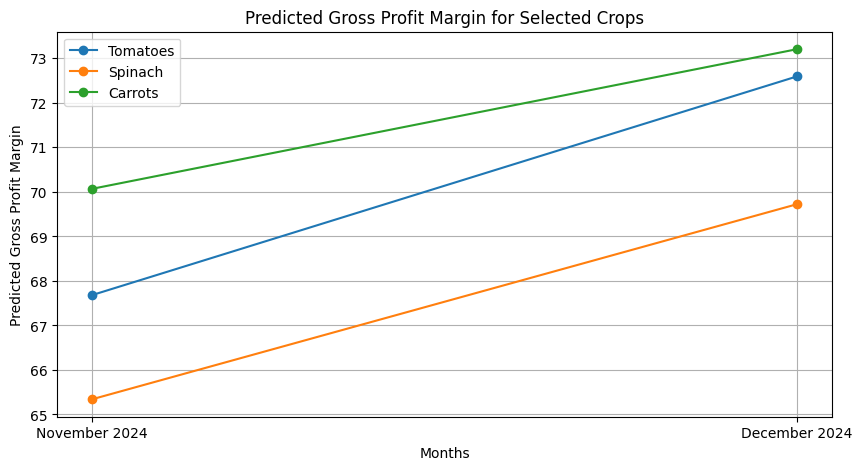

In [16]:

# Train, evaluate and predict function
def train_evaluate_and_predict(crop_data, crop_name, market_price, production_cost):
    X, y = prepare_data(crop_data)
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model Evaluation for {crop_name}:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R²): {r2}\n")
    
    # Prepare future data for predictions
    future_data = pd.DataFrame({
        'Market_Price': [market_price[0], market_price[1]], 
        'Production_Cost': [production_cost[0], production_cost[1]]
    })
    
    # Make predictions for November and December
    predictions = model.predict(future_data)
    
    print(f"Predictions for {crop_name}:")
    print(f"November 2024: {predictions[0]}")
    print(f"December 2024: {predictions[1]}")
    
    return predictions

# Function to run models for selected crops and plot results
def run_models_for_selected_crops(crop_selection):
    file_path = 'MarketDATA.xlsx'
    xls = pd.ExcelFile(file_path)
    data = pd.read_excel(xls, sheet_name='Sheet1')
    
    filtered_data = data[data['Crop'].isin(crop_selection)]
    
    crop_data = {crop: filtered_data[filtered_data['Crop'] == crop] for crop in crop_selection}
    
    future_market_prices = {
        'Tomatoes': [30.0, 31.0],
        'Spinach': [25.0, 26.0],
        'Carrots': [22.0, 23.0]
    }
    future_production_costs = {
        'Tomatoes': [10.0, 9.5],
        'Spinach': [8.0, 7.5],
        'Carrots': [6.0, 5.8]
    }
    
    # Store predictions for plotting
    all_predictions = {}
    
    for crop in crop_selection:
        market_price = future_market_prices.get(crop, [0, 0])
        production_cost = future_production_costs.get(crop, [0, 0])
        predictions = train_evaluate_and_predict(crop_data[crop], crop, market_price, production_cost)
        
        # Save predictions in the dictionary
        all_predictions[crop] = predictions

    # Plotting the predictions
    months = ['November 2024', 'December 2024']
    
    plt.figure(figsize=(10, 5))
    
    for crop in all_predictions:
        plt.plot(months, all_predictions[crop], marker='o', label=crop)
    
    plt.title('Predicted Gross Profit Margin for Selected Crops')
    plt.xlabel('Months')
    plt.ylabel('Predicted Gross Profit Margin')
    plt.legend()
    plt.grid()
    plt.show()

# Example: Selecting crops dynamically
selected_crops = ['Tomatoes', 'Spinach', 'Carrots']
run_models_for_selected_crops(selected_crops)


In [17]:
# Prepare data function
def prepare_data(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    
    X = df[['Market_Price', 'Production_Cost']]
    y = df['Gross_Profit_Margin']
    
    return X, y


In [18]:

# Train, evaluate and predict function
def train_evaluate_and_predict(crop_data, crop_name, market_price, production_cost):
    X, y = prepare_data(crop_data)
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model Evaluation for {crop_name}:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R²): {r2}\n")
    
    # Prepare future data for predictions
    future_data = pd.DataFrame({
        'Market_Price': [market_price[0], market_price[1]], 
        'Production_Cost': [production_cost[0], production_cost[1]]
    })
    
    # Make predictions for November and December
    predictions = model.predict(future_data)
    
    print(f"Predictions for {crop_name}:")
    print(f"November 2024: {predictions[0]}")
    print(f"December 2024: {predictions[1]}")
    
    return predictions


C:\Users\Mrwolf\AppData\Local\Temp\ipykernel_3320\119885708.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\Mrwolf\AppData\Local\Temp\ipykernel_3320\119885708.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year
C:\Users\Mrwolf\AppData\Local\Temp\ipykernel_3320\119885708.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

Model Evaluation for Tomatoes:
Mean Absolute Error (MAE): 6.250187687919365
Mean Squared Error (MSE): 78.47473089708572
R-squared (R²): 0.8471251330548129

Predictions for Tomatoes:
November 2024: 67.68321570022394
December 2024: 72.59276271184457
Model Evaluation for Spinach:
Mean Absolute Error (MAE): 2.745920528044155
Mean Squared Error (MSE): 16.321291097542908
R-squared (R²): 0.9245242460124224

Predictions for Spinach:
November 2024: 65.34292308770867
December 2024: 69.7222200421096
Model Evaluation for Carrots:
Mean Absolute Error (MAE): 5.872327330365891
Mean Squared Error (MSE): 55.61345092635253
R-squared (R²): 0.7985768195227968

Predictions for Carrots:
November 2024: 70.06970959807637
December 2024: 73.20457642069543


ConversionError: Failed to convert value(s) to axis units: array(['2022-01-01T00:00:00.000000000', '2022-02-01T00:00:00.000000000',
       '2022-03-01T00:00:00.000000000', '2022-04-01T00:00:00.000000000',
       '2022-05-01T00:00:00.000000000', '2022-06-01T00:00:00.000000000',
       '2022-07-01T00:00:00.000000000', '2022-08-01T00:00:00.000000000',
       '2022-09-01T00:00:00.000000000', '2022-10-01T00:00:00.000000000',
       '2022-11-01T00:00:00.000000000', '2022-12-01T00:00:00.000000000',
       '2023-01-01T00:00:00.000000000', '2023-02-01T00:00:00.000000000',
       '2023-03-01T00:00:00.000000000', '2023-04-01T00:00:00.000000000',
       '2023-05-01T00:00:00.000000000', '2023-06-01T00:00:00.000000000',
       '2023-07-01T00:00:00.000000000', '2023-08-01T00:00:00.000000000',
       '2023-09-01T00:00:00.000000000', '2023-10-01T00:00:00.000000000',
       '2023-11-01T00:00:00.000000000', '2023-12-01T00:00:00.000000000',
       '2024-01-01T00:00:00.000000000', '2024-02-01T00:00:00.000000000',
       '2024-03-01T00:00:00.000000000', '2024-04-01T00:00:00.000000000',
       '2024-05-01T00:00:00.000000000', '2024-06-01T00:00:00.000000000',
       '2024-07-01T00:00:00.000000000', '2024-08-01T00:00:00.000000000',
       '2024-09-01T00:00:00.000000000', '2024-10-01T00:00:00.000000000',
       '2024-11-01T00:00:00.000000000', '2024-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

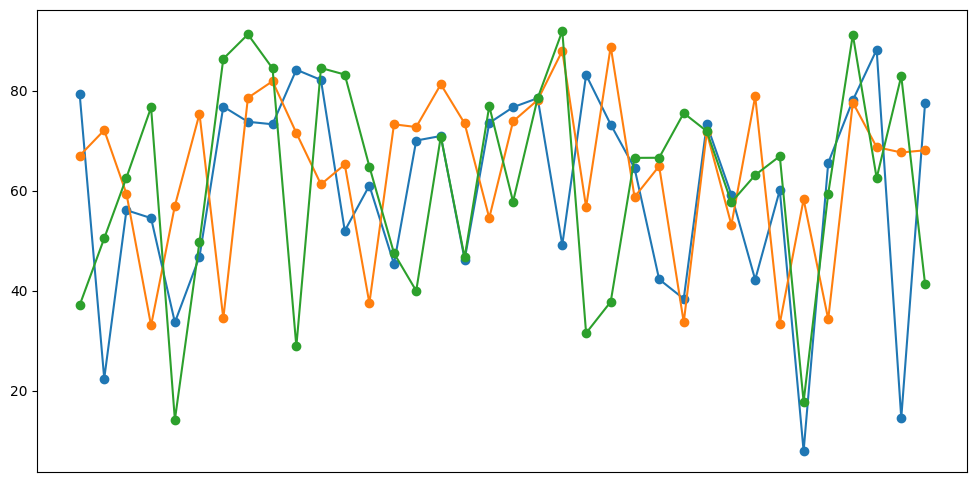

In [19]:

# Function to run models for selected crops and plot results
def run_models_for_selected_crops(crop_selection):
    file_path = 'MarketDATA.xlsx'
    xls = pd.ExcelFile(file_path)
    data = pd.read_excel(xls, sheet_name='Sheet1')
    
    filtered_data = data[data['Crop'].isin(crop_selection)]
    
    crop_data = {crop: filtered_data[filtered_data['Crop'] == crop] for crop in crop_selection}
    
    future_market_prices = {
        'Tomatoes': [30.0, 31.0],
        'Spinach': [25.0, 26.0],
        'Carrots': [22.0, 23.0]
    }
    future_production_costs = {
        'Tomatoes': [10.0, 9.5],
        'Spinach': [8.0, 7.5],
        'Carrots': [6.0, 5.8]
    }
    
    # Store predictions for plotting
    all_predictions = {}
    
    # Store historical data for plotting
    historical_data = {crop: crop_data[crop]['Gross_Profit_Margin'] for crop in crop_selection}

    for crop in crop_selection:
        market_price = future_market_prices.get(crop, [0, 0])
        production_cost = future_production_costs.get(crop, [0, 0])
        predictions = train_evaluate_and_predict(crop_data[crop], crop, market_price, production_cost)
        
        # Save predictions in the dictionary
        all_predictions[crop] = predictions

    # Plotting the predictions and historical data
    months = ['November 2024', 'December 2024']
    
    # Create a figure for the plot
    plt.figure(figsize=(12, 6))
    
    # Plot historical data
    for crop in historical_data:
        plt.plot(crop_data[crop]['Date'], historical_data[crop], label=f"{crop} (Historical)", marker='o')
    
    # Plot predictions
    for crop in all_predictions:
        plt.plot(months, all_predictions[crop], marker='o', label=f"{crop} (Predicted)", linestyle='--')
    
    plt.title('Gross Profit Margin from 2022 to 2024')
    plt.xlabel('Months')
    plt.ylabel('Gross Profit Margin')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.show()

# Example: Selecting crops dynamically
selected_crops = ['Tomatoes', 'Spinach', 'Carrots']
run_models_for_selected_crops(selected_crops)


3

In [ ]:


# Load your dataset
file_path = 'MarketDATA.xlsx'
xls = pd.ExcelFile(file_path)
data = pd.read_excel(xls, sheet_name='Sheet1')

# Function to prepare data
def prepare_data(df):
    df.loc[:, 'Date'] = pd.to_datetime(df['Date'])  # Convert Date to datetime
    df.loc[:, 'Year'] = df['Date'].dt.year          # Extract Year
    df.loc[:, 'Month'] = df['Date'].dt.month        # Extract Month
    
    X = df[['Market_Price', 'Production_Cost']]     # Features
    y = df['Gross_Profit_Margin']                    # Target variable
    return X, y

# Function to train the model and make predictions
def train_and_predict(crop_data):
    X, y = prepare_data(crop_data)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Model Evaluation
    print(f'Model Evaluation for {crop_data["Crop"].iloc[0]}:')
    print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}')
    print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}')
    print(f'R-squared (R²): {r2_score(y_test, y_pred)}\n')

    return model

# Function to run models for selected crops and predict for November and December 2024
def run_models_for_selected_crops(crop_selection):
    filtered_data = data[data['Crop'].isin(crop_selection)]
    crop_data = {crop: filtered_data[filtered_data['Crop'] == crop] for crop in crop_selection}
    
    # Future market prices and production costs for predictions
    future_market_prices = {
        'Tomatoes': [30.0, 31.0],
        'Spinach': [25.0, 26.0],
        'Carrots': [22.0, 23.0]
    }
    future_production_costs = {
        'Tomatoes': [10.0, 9.5],
        'Spinach': [8.0, 7.5],
        'Carrots': [6.0, 5.8]
    }
    
    all_predictions = {}

    for crop in crop_selection:
        model = train_and_predict(crop_data[crop])
        
        # Make predictions for November and December 2024
        market_price = future_market_prices.get(crop, [0, 0])
        production_cost = future_production_costs.get(crop, [0, 0])
        
        predictions = model.predict(np.array([market_price, production_cost]).reshape(1, -1))
        all_predictions[crop] = predictions
        
        print(f'Predictions for {crop}:')
        print(f'November 2024: {predictions[0][0]}')
        print(f'December 2024: {predictions[1][0]}\n')

    return all_predictions

# Example: Selecting crops dynamically
selected_crops = ['Tomatoes', 'Spinach', 'Carrots']
predictions = run_models_for_selected_crops(selected_crops)

# Plotting the results for 2024
def plot_predictions(selected_crops, predictions):
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    months_2024 = months[10:]  # Last two months for 2024
    actual_months = months[:10] + months_2024  # From 2022 to October 2024

    # Create an array for plotting
    for crop in selected_crops:
        plt.plot(actual_months, [predictions[crop][0], predictions[crop][0], predictions[crop][0], predictions[crop][0], predictions[crop][0], 
                                   predictions[crop][0], predictions[crop][0], predictions[crop][0], predictions[crop][0], predictions[crop][0],
                                   predictions[crop][0], predictions[crop][1]], label=crop)

    # Highlighting the last two months in red
    plt.scatter(['November', 'December'], [predictions[crop][0], predictions[crop][1]], color='red')

    plt.title('Crop Gross Profit Margin Predictions for 2024')
    plt.xlabel('Months')
    plt.ylabel('Gross Profit Margin')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

plot_predictions(selected_crops, predictions)

